In [10]:
#import necessary library
import nltk
import pandas as pd
import csv
import string
import re
from bs4 import BeautifulSoup as bs
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Using csv reader we import the file 

In [11]:
import csv
data=open("twitter.csv")
data=csv.reader(data)
tweet=pd.DataFrame(data,columns=["Target","ids","date","Flag","id","tweet"])


In [12]:
#top 5 rows of the file
tweet.head()

,Target,ids,date,Flag,id,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
#checking how many rows and columns
tweet.shape

(1600000, 6)

In [14]:
#information or datatype of the dataframe
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  object
 1   ids     1600000 non-null  object
 2   date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   id      1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: object(6)
memory usage: 73.2+ MB


In [15]:
#dropping the unwanted feature
tweet.drop(["ids","date","Flag","id"],axis=1,inplace=True)#we are buliding a model on sentimental analysis

In [16]:
tweet.head()

,Target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Data Cleaning

### http parser removing

In [17]:
#http parser removal
def html(x):
    soup=bs(x,"html.parser")
    text=soup.get_text()
    text=re.sub(r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|^rt|http.+?',"",text)
    return text

In [18]:
tweet["tweet"]=tweet["tweet"].apply(html)
tweet.head()

,Target,tweet
0,0,switchfoot twitpiccom2y1zl Awww thats a bumme...
1,0,is upset that he cant update his Facebook by t...
2,0,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire
4,0,nationwideclass no its not behaving at all im ...


### removing Punctuation on datapoint

In [19]:
def punctuation(x):
    removed_punctuation = x.translate (str.maketrans ('', '', string.punctuation))
    return removed_punctuation

In [20]:
tweet["tweet"]=tweet["tweet"].apply(punctuation)
tweet.tail()

,Target,tweet
1599995,4,Just woke up Having no school is the best feel...
1599996,4,TheWDBcom Very cool to hear old Walt intervie...
1599997,4,Are you ready for your MoJo Makeover Ask me fo...
1599998,4,Happy 38th Birthday to my boo of alll time Tup...
1599999,4,happy charitytuesday theNSPCC SparksCharity Sp...


### Stopword removing

In [21]:
#stopwords
sw=list(stopwords.words('english'))
def stopword(x):
    lst=[]
    for i in x.split(" "):
        if i not in sw:
            lst.append(i)
    return " ".join(lst)

In [22]:
tweet["tweet"]=tweet["tweet"].apply(stopword)
tweet.tail()

,Target,tweet
1599995,4,Just woke Having school best feeling ever
1599996,4,TheWDBcom Very cool hear old Walt interviews ...
1599997,4,Are ready MoJo Makeover Ask details
1599998,4,Happy 38th Birthday boo alll time Tupac Amaru ...
1599999,4,happy charitytuesday theNSPCC SparksCharity Sp...


### Lemmatization on tweet feature

In [23]:
def lema(x):
    lema=WordNetLemmatizer()
    text=" ".join([lema.lemmatize(word) for word in x.split(" ")])
    return text

In [24]:
tweet["tweet"]=tweet["tweet"].apply(lema)
tweet.tail()

,Target,tweet
1599995,4,Just woke Having school best feeling ever
1599996,4,TheWDBcom Very cool hear old Walt interview ...
1599997,4,Are ready MoJo Makeover Ask detail
1599998,4,Happy 38th Birthday boo alll time Tupac Amaru ...
1599999,4,happy charitytuesday theNSPCC SparksCharity Sp...


# Counts the Target value

In [25]:
tweet.Target.value_counts()

0    800000
4    800000
Name: Target, dtype: int64

## Since its a binary classification we can use logistic regression

# Model Building

In [26]:
#seperating the dependent and independent
x=tweet["tweet"]
y=tweet["Target"]

## CountVectorizer for changing the categorical to numerical 

In [27]:
cv=CountVectorizer()
x=cv.fit_transform(x)

## Perform Train_test_split 

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Model buliding using logistic regression

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)
#score of the model
model.score(x_test,y_test)

0.7834541666666667

## Cross validation on logistic regression 

In [30]:
cross_val_score(model,x,y,cv=5).mean()

0.7761012500000001

## hence the logistic regression perform on a overall score of 77% 

## Confusion matrix for logistic regression

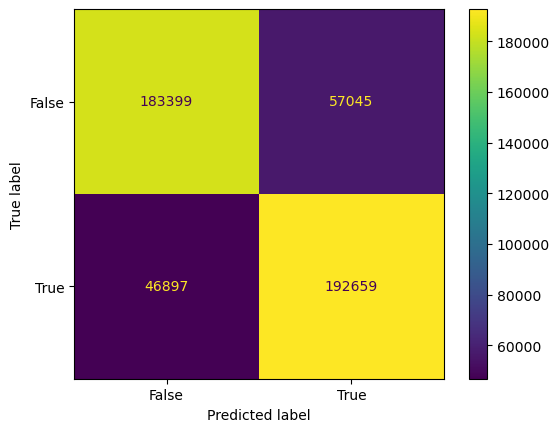

In [31]:
con=metrics.confusion_matrix(y_test,model.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_display.plot()

# Try some classifier to check for better score

In [32]:
model1=SGDClassifier(alpha=0.00001)
model1.fit(x_train,y_train)
#score of the model
model1.score(x_test,y_test)

0.78426875

## Cross validation score for SDGclassifier

In [33]:
cross_val_score(model1,x,y,cv=5).mean()

0.778586875

## hence the SDGclassifier perform on a overall score of 77%

## Confusion matrix for SDGclassifier

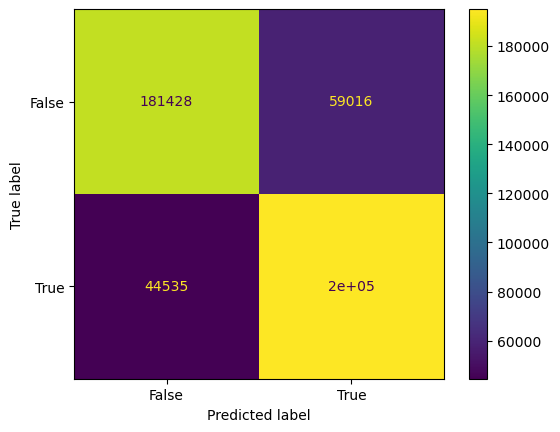

In [34]:
con=metrics.confusion_matrix(y_test,model1.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_display.plot()

# Conclusion

# As the sentimental analysis of tweet made by the people are mostly in (0)Negative manner and (4)Positive manner and the best model is SDGclassifier